In [383]:
#Import
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn import preprocessing

#Read .CSV files
training = pd.read_csv("training.csv", delimiter=";", decimal=".")
symptoms1 = pd.read_csv("symptoms1.csv", delimiter=";", decimal=".")
symptoms2 = pd.read_csv("symptoms2.csv", delimiter=";", decimal=".")

In [384]:
#Convert to datetime objects
training['Date'] = pd.to_datetime(training.Date, format = '%d-%m-%Y %H:%M')
symptoms1['Timestamp'] = pd.to_datetime(symptoms1.Timestamp, format = '%Y-%m-%dT%H:%M:%S.%f%z')
symptoms2['Timestamp'] = pd.to_datetime(symptoms1.Timestamp, format = '%Y-%m-%dT%H:%M:%S.%f%z')

In [385]:
#Finding the correct symptoms
#symptoms1 = symptoms1[symptoms1.FeatureName == 'pain over left ear']

#Finding the correct exercises
trainingKarsten = training[training.Exercise == 'Karsten']

#Find mean of symptoms for each day
symptomsSeries = symptoms1.groupby(symptoms1.Timestamp.dt.date).Value.mean()
symptoms1Mean = pd.DataFrame({'Timestamp':symptomsSeries.index, 'Value':symptomsSeries.values})
symptoms1Mean['Timestamp'] = pd.to_datetime(symptoms1Mean.Timestamp, format = '%Y-%m-%d %H:%M:%S.%f')

symptoms1Mean

,Timestamp,Value
0,2020-06-03,3.000000
1,2020-06-11,4.000000
2,2020-06-12,2.000000
3,2020-06-13,3.333333
4,2020-06-14,2.833333
5,2020-06-15,2.000000
6,2020-06-16,1.000000
7,2020-06-18,2.000000
8,2020-06-20,2.500000
9,2020-06-21,2.750000


In [386]:
#Normalize data
trainingKarsten.Reps = trainingKarsten.Reps / trainingKarsten.Reps.max() 
symptoms1Sum.Value = symptoms1Sum.Value / symptoms1Sum.Value.max()

trainingKarsten

C:\Users\lars\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,Workout name,Exercise,Set,Weight,Reps,Distance,Duration,Measurement unit,Notes
1,2020-06-05 15:27:00,Day 3,Karsten,1,NaN,1.000000,NaN,NaN,kg,NaN
7,2020-06-05 15:27:00,Day 3,Karsten,1,NaN,1.000000,NaN,NaN,kg,NaN
66,2020-06-10 15:13:00,Day 3,Karsten,1,NaN,0.714286,NaN,NaN,kg,NaN
72,2020-06-10 15:13:00,Day 3,Karsten,1,NaN,0.523810,NaN,NaN,kg,NaN
204,2020-06-20 15:00:00,Day 3,Karsten,1,NaN,1.000000,NaN,NaN,kg,NaN
211,2020-06-20 15:00:00,Day 3,Karsten,1,NaN,0.761905,NaN,NaN,kg,NaN
278,2020-06-25 15:07:00,Day 3,Karsten,1,NaN,1.000000,NaN,NaN,kg,NaN
285,2020-06-25 15:07:00,Day 3,Karsten,1,NaN,0.619048,NaN,NaN,kg,NaN


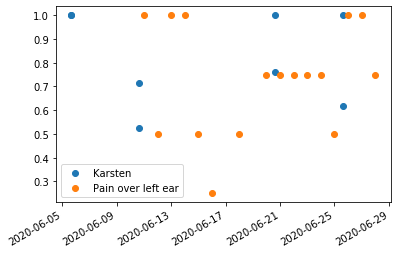

In [387]:
#plot karsten
plt.plot(trainingKarsten.Date, trainingKarsten.Reps, linestyle='', marker="o",  label='Karsten')

#plot symptoms
plt.plot(symptoms1Max.Timestamp, symptoms1Max.Value, linestyle='', marker="o", label='Pain over left ear')

#Make graph pretty
plt.legend()
plt.gcf().autofmt_xdate()


1      1.000000
7      1.000000
66     0.714286
72     0.523810
204    1.000000
211    0.761905
278    1.000000
285    0.619048
Name: Reps, dtype: float64

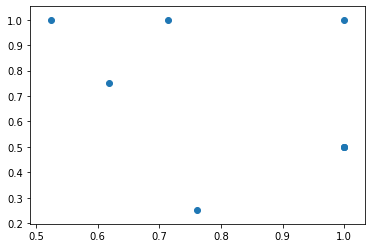

In [390]:
dateRange = pd.date_range('09-01-2013', '09-30-2013')

#Reindex data
trainingKarsten.reindex(dateRange, fill_value=0)
symptoms1Sum.reindex(dateRange, fill_value=0)



plt.scatter(trainingKarsten.Reps, symptoms1Max.Value[:8])

trainingKarsten.Reps
